# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## 1.1 Inicialización

In [1]:
# Cargar todas las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st

## 1.2 Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

users = pd.read_csv('D:megaline_users.csv')
calls = pd.read_csv('D:megaline_calls.csv')
messages = pd.read_csv('D:megaline_messages.csv')
internet = pd.read_csv('D:megaline_internet.csv')
plans = pd.read_csv('D:megaline_plans.csv')



## 1.3 Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [3]:
print('info de la tabla users')
users.info()
print()
print('info de la tabla calls')
calls.info()
print()
print('info de la tabla messages')
messages.info()
print()
print('info de la tabla internet')
internet.info()
print()
print('info de la tabla plans')
plans.info()

info de la tabla users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

info de la tabla calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
me

In [4]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['active_user'] = users['churn_date'].isna()

calls['call_date'] = pd.to_datetime(calls['call_date'])
calls = calls[calls['duration'] >= 0]  # Eliminar llamadas con duración negativa


messages['message_date'] = pd.to_datetime(messages['message_date'])

internet['session_date'] = pd.to_datetime(internet['session_date'])
internet = internet[internet['mb_used'] >= 0]  # Eliminar valores negativos



In [5]:
print('info de la tabla users')
users.info()
print()
print('info de la tabla calls')
calls.info()
print()
print('info de la tabla messages')
messages.info()
print()
print('info de la tabla internet')
internet.info()
print()
print('info de la tabla plans')
plans.info()

info de la tabla users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object        
 2   last_name    500 non-null    object        
 3   age          500 non-null    int64         
 4   city         500 non-null    object        
 5   reg_date     500 non-null    datetime64[ns]
 6   plan         500 non-null    object        
 7   churn_date   34 non-null     datetime64[ns]
 8   active_user  500 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(4)
memory usage: 31.9+ KB

info de la tabla calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 no

In [6]:
# Verificar los planes únicos en users
unique_plans_users = users['plan'].unique()
unique_plans_plans = plans['plan_name'].unique()

print("Planes en users:", unique_plans_users)
print("Planes en plans:", unique_plans_plans)

# Identificar planes que no coinciden
mismatched_plans = set(unique_plans_users) - set(unique_plans_plans)
print("Planes no coincidentes:", mismatched_plans)


Planes en users: ['ultimate' 'surf']
Planes en plans: ['surf' 'ultimate']
Planes no coincidentes: set()


In [7]:
# Verificar duplicados en users
duplicates_users = users.duplicated().sum()
print(f"Duplicados en users: {duplicates_users}")

# Verificar duplicados en calls
duplicates_calls = calls.duplicated().sum()
print(f"Duplicados en calls: {duplicates_calls}")

# Verificar duplicados en messages
duplicates_messages = messages.duplicated().sum()
print(f"Duplicados en messages: {duplicates_calls}")

# Verificar duplicados en interntet
duplicates_internet = internet.duplicated().sum()
print(f"Duplicados en internet: {duplicates_calls}")

# Eliminar duplicados si es necesario
users.drop_duplicates(inplace=True)
calls.drop_duplicates(inplace=True)
messages.drop_duplicates(inplace=True)
internet.drop_duplicates(inplace=True)


Duplicados en users: 0
Duplicados en calls: 0
Duplicados en messages: 0
Duplicados en internet: 0


In [8]:
# Verificar que todos los user_id en calls existen en users
invalid_user_ids_calls = set(calls['user_id']) - set(users['user_id'])
print(f"user_id inválidos en calls: {invalid_user_ids_calls}")

# Verificar que todos los user_id en calls existen en messages
invalid_user_ids_messages = set(messages['user_id']) - set(users['user_id'])
print(f"user_id inválidos en messages: {invalid_user_ids_messages}")

# Verificar que todos los user_id en calls existen en internet
invalid_user_ids_internet = set(internet['user_id']) - set(users['user_id'])
print(f"user_id inválidos en internet: {invalid_user_ids_internet}")


user_id inválidos en calls: set()
user_id inválidos en messages: set()
user_id inválidos en internet: set()


## 1.4 Tarifas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [10]:
# Imprime una muestra de los datos para las tarifas
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### 1.4.1 Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:
##NO SE VE LA NECESIDAD DE REALZIAR AJUSTES

### 1.4.2 Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [12]:
##NO SE VE LA NECESIDAD DE REALZIAR AJUSTES

## 1.5 Usuarios/as

In [13]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object        
 2   last_name    500 non-null    object        
 3   age          500 non-null    int64         
 4   city         500 non-null    object        
 5   reg_date     500 non-null    datetime64[ns]
 6   plan         500 non-null    object        
 7   churn_date   34 non-null     datetime64[ns]
 8   active_user  500 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(4)
memory usage: 31.9+ KB


In [14]:
# Imprime una muestra de datos para usuarios
users.sample(n= 5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,active_user
279,1279,Neal,Duke,27,"Baton Rouge, LA MSA",2018-02-05,ultimate,NaT,True
312,1312,Kory,Emerson,42,"Fresno, CA MSA",2018-01-26,surf,NaT,True
46,1046,Beata,Hooper,67,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-19,surf,NaT,True
477,1477,Magaly,Rivas,52,"Riverside-San Bernardino-Ontario, CA MSA",2018-08-24,ultimate,NaT,True
224,1224,Kelly,Cole,74,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-06-28,ultimate,NaT,True


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### 1.5.1 Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
#YA SE CORRIGIO LAS COLUMNAS DE FECHA AL INICIO

### 1.5.2 Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [16]:
#YA SE CORRIGIO LAS COLUMNAS DE FECHA AL INICIO Y EVALUO DUPLICADOS O INCONSISTENCIA ENTRE USER _ID Y PLAN

## 1.6 Llamadas

In [17]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [18]:
# Imprime una muestra de datos para las llamadas
calls.sample(n=5)

,id,user_id,call_date,duration
72470,1257_210,1257,2018-10-18,15.05
114591,1401_383,1401,2018-08-25,8.59
49491,1179_150,1179,2018-11-16,9.76
121927,1430_547,1430,2018-12-28,5.60
16674,1065_42,1065,2018-09-25,15.81


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### 1.6.1 Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
#YA SE CORRIGIO LAS COLUMNAS DE FECHA AL INICIO Y EVALUO DUPLICADOS O INCONSISTENCIA ENTRE USER _ID Y PLAN

### 1.6.2 Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [20]:
#YA SE CORRIGIO LAS COLUMNAS DE FECHA AL INICIO Y EVALUO DUPLICADOS O INCONSISTENCIA ENTRE USER _ID Y PLAN

## 1.7 Mensajes

In [21]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes\
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [22]:
# Imprime una muestra de datos para los mensajes
messages.sample(n=5)

,id,user_id,message_date
8499,1061_505,1061,2018-12-31
10072,1076_180,1076,2018-08-21
34851,1222_64,1222,2018-07-16
41280,1264_464,1264,2018-12-12
8118,1061_124,1061,2018-08-28


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### 1.7.1 Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [23]:
#YA SE CORRIGIO LAS COLUMNAS DE FECHA AL INICIO Y EVALUO DUPLICADOS O INCONSISTENCIA ENTRE USER _ID Y PLAN

### 1.7.2 Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [24]:
#YA SE CORRIGIO LAS COLUMNAS DE FECHA AL INICIO Y EVALUO DUPLICADOS O INCONSISTENCIA ENTRE USER _ID Y PLAN

## 1.8 Internet

In [25]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [26]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(n=5)

,id,user_id,session_date,mb_used
80612,1377_37,1377,2018-12-24,0.00
32528,1147_131,1147,2018-12-14,736.46
36114,1163_95,1163,2018-10-03,66.17
592,1004_210,1004,2018-08-11,352.61
53929,1244_47,1244,2018-12-18,274.82


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### 1.8.1 Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [27]:
#YA SE CORRIGIO LAS COLUMNAS DE FECHA AL INICIO Y EVALUO DUPLICADOS O INCONSISTENCIA ENTRE USER _ID Y PLAN

### 1.8.2 Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [28]:
#YA SE CORRIGIO LAS COLUMNAS DE FECHA AL INICIO Y EVALUO DUPLICADOS O INCONSISTENCIA ENTRE USER _ID Y PLAN

## 1.9 Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [29]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [30]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## 1.10 Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [31]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Crear una columna para el mes y el año
calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month

# Agrupar por user_id, year y month y contar el número de llamadas
calls_per_month = calls.groupby(['user_id', 'year', 'month']).agg(calls_made=('id', 'count')).reset_index()

# Ver los primeros registros para verificar el resultado
print(calls_per_month.head())


calls_per_month.to_csv('calls_per_month.csv', index=False)

   user_id  year  month  calls_made
0     1000  2018     12          16
1     1001  2018      8          27
2     1001  2018      9          49
3     1001  2018     10          65
4     1001  2018     11          64


In [32]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month

# Agrupar por user_id, year y month y sumar los minutos usados
minutes_per_month = calls.groupby(['user_id', 'year', 'month']).agg(minutes_used=('duration', 'sum')).reset_index()

# Ver los primeros registros para verificar el resultado
print(minutes_per_month.head())

# Guardar el resultado en un archivo CSV
minutes_per_month.to_csv('minutes_per_month.csv', index=False)


   user_id  year  month  minutes_used
0     1000  2018     12        116.83
1     1001  2018      8        171.14
2     1001  2018      9        297.69
3     1001  2018     10        374.11
4     1001  2018     11        404.59


In [33]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Crear columnas separadas para el año y el mes
messages['year'] = messages['message_date'].dt.year
messages['month'] = messages['message_date'].dt.month

# Agrupar por user_id, year y month y contar el número de mensajes
messages_per_month = messages.groupby(['user_id', 'year', 'month']).agg(messages_sent=('id', 'count')).reset_index()

# Ver los primeros registros para verificar el resultado
print(messages_per_month.head())

# Guardar el resultado en un archivo CSV
messages_per_month.to_csv('messages_per_month.csv', index=False)

   user_id  year  month  messages_sent
0     1000  2018     12             11
1     1001  2018      8             30
2     1001  2018      9             44
3     1001  2018     10             53
4     1001  2018     11             36


In [34]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Crear columnas separadas para el año y el mes
internet['year'] = internet['session_date'].dt.year
internet['month'] = internet['session_date'].dt.month

# Agrupar por user_id, year y month y sumar el volumen de datos
internet_per_month = internet.groupby(['user_id', 'year', 'month']).agg(data_used_mb=('mb_used', 'sum')).reset_index()

# Ver los primeros registros para verificar el resultado
print(internet_per_month.head())

# Guardar el resultado en un archivo CSV
internet_per_month.to_csv('internet_per_month.csv', index=False)


   user_id  year  month  data_used_mb
0     1000  2018     12       1901.47
1     1001  2018      8       6919.15
2     1001  2018      9      13314.82
3     1001  2018     10      22330.49
4     1001  2018     11      18504.30


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [35]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Cargar los archivos CSV generados previamente
calls_per_month = pd.read_csv('calls_per_month.csv')
minutes_per_month = pd.read_csv('minutes_per_month.csv')
messages_per_month = pd.read_csv('messages_per_month.csv')
internet_per_month = pd.read_csv('internet_per_month.csv')

# Fusionar los datos en el orden especificado
all_data = pd.merge(
    pd.merge(
        pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'year', 'month'], how='outer'),
        messages_per_month, on=['user_id', 'year', 'month'], how='outer'
    ),
    internet_per_month, on=['user_id', 'year', 'month'], how='outer'
)

# Guardar el resultado en un archivo CSV
all_data.to_csv('all_data_per_month.csv', index=False)

# Mostrar los primeros registros para verificar el resultado
print(all_data.head())

   user_id  year  month  calls_made  minutes_used  messages_sent  data_used_mb
0     1000  2018     12        16.0        116.83           11.0       1901.47
1     1001  2018      8        27.0        171.14           30.0       6919.15
2     1001  2018      9        49.0        297.69           44.0      13314.82
3     1001  2018     10        65.0        374.11           53.0      22330.49
4     1001  2018     11        64.0        404.59           36.0      18504.30


In [36]:
# Añadir la información de la tarifa
# Primero, cargamos la tabla de usuarios para obtener el plan de cada usuario
users = pd.read_csv('megaline_users.csv')

# Fusionar la información de usuarios con los datos fusionados
all_data = pd.merge(all_data, users[['user_id', 'plan']], on='user_id', how='left')

# Fusionar con la tabla de planes para obtener detalles de la tarifa
all_data = pd.merge(all_data, plans, left_on='plan', right_on='plan_name', how='left')

# Eliminar columnas innecesarias después de la fusión
all_data.drop(['plan_name'], axis=1, inplace=True)

# Guardar el resultado en un archivo CSV
all_data.to_csv('all_data_with_plan.csv', index=False)

# Mostrar los primeros registros para verificar el resultado
print(all_data.head())


   user_id  year  month  calls_made  minutes_used  messages_sent  \
0     1000  2018     12        16.0        116.83           11.0   
1     1001  2018      8        27.0        171.14           30.0   
2     1001  2018      9        49.0        297.69           44.0   
3     1001  2018     10        65.0        374.11           53.0   
4     1001  2018     11        64.0        404.59           36.0   

   data_used_mb      plan  messages_included  mb_per_month_included  \
0       1901.47  ultimate               1000                  30720   
1       6919.15      surf                 50                  15360   
2      13314.82      surf                 50                  15360   
3      22330.49      surf                 50                  15360   
4      18504.30      surf                 50                  15360   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0              3000               70           7             0.01   
1               500       

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [37]:
# Calcula el ingreso mensual para cada usuario

# Cargar el archivo CSV con los datos fusionados
all_data = pd.read_csv('all_data_with_plan.csv')

# Definir la función para calcular costos adicionales
def calculate_extra_cost(row):
    # Costos adicionales por llamadas
    if row['calls_made'] > row['minutes_included']:
        extra_minutes = row['calls_made'] - row['minutes_included']
        call_cost = extra_minutes * row['usd_per_minute']
    else:
        call_cost = 0

    # Costos adicionales por mensajes
    if row['messages_sent'] > row['messages_included']:
        extra_messages = row['messages_sent'] - row['messages_included']
        message_cost = extra_messages * row['usd_per_message']
    else:
        message_cost = 0

    # Costos adicionales por datos
    total_mb_used = row['data_used_mb']
    if total_mb_used > row['mb_per_month_included']:
        extra_mb = total_mb_used - row['mb_per_month_included']
        extra_gb = np.ceil(extra_mb / 1024)  # Convertir MB a GB
        data_cost = extra_gb * row['usd_per_gb']
    else:
        data_cost = 0

    # Coste total adicional
    total_extra_cost = call_cost + message_cost + data_cost
    
    # Añadir el costo mensual del plan
    total_monthly_cost = row['usd_monthly_pay'] + total_extra_cost
    
    return total_monthly_cost

# Aplicar la función a cada fila del DataFrame
all_data['monthly_revenue'] = all_data.apply(calculate_extra_cost, axis=1)

# Guardar el resultado en un archivo CSV
all_data.to_csv('all_data_with_revenue.csv', index=False)

# Mostrar los primeros registros para verificar el resultado
print(all_data.head())


   user_id  year  month  calls_made  minutes_used  messages_sent  \
0     1000  2018     12        16.0        116.83           11.0   
1     1001  2018      8        27.0        171.14           30.0   
2     1001  2018      9        49.0        297.69           44.0   
3     1001  2018     10        65.0        374.11           53.0   
4     1001  2018     11        64.0        404.59           36.0   

   data_used_mb      plan  messages_included  mb_per_month_included  \
0       1901.47  ultimate               1000                  30720   
1       6919.15      surf                 50                  15360   
2      13314.82      surf                 50                  15360   
3      22330.49      surf                 50                  15360   
4      18504.30      surf                 50                  15360   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0              3000               70           7             0.01   
1               500       

## 1.11 Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### 1.11.1 Llamadas

   plan  year  month  minutes_used
0  surf  2018      1    192.840000
1  surf  2018      2    280.851111
2  surf  2018      3    310.970000
3  surf  2018      4    332.380000
4  surf  2018      5    387.108000


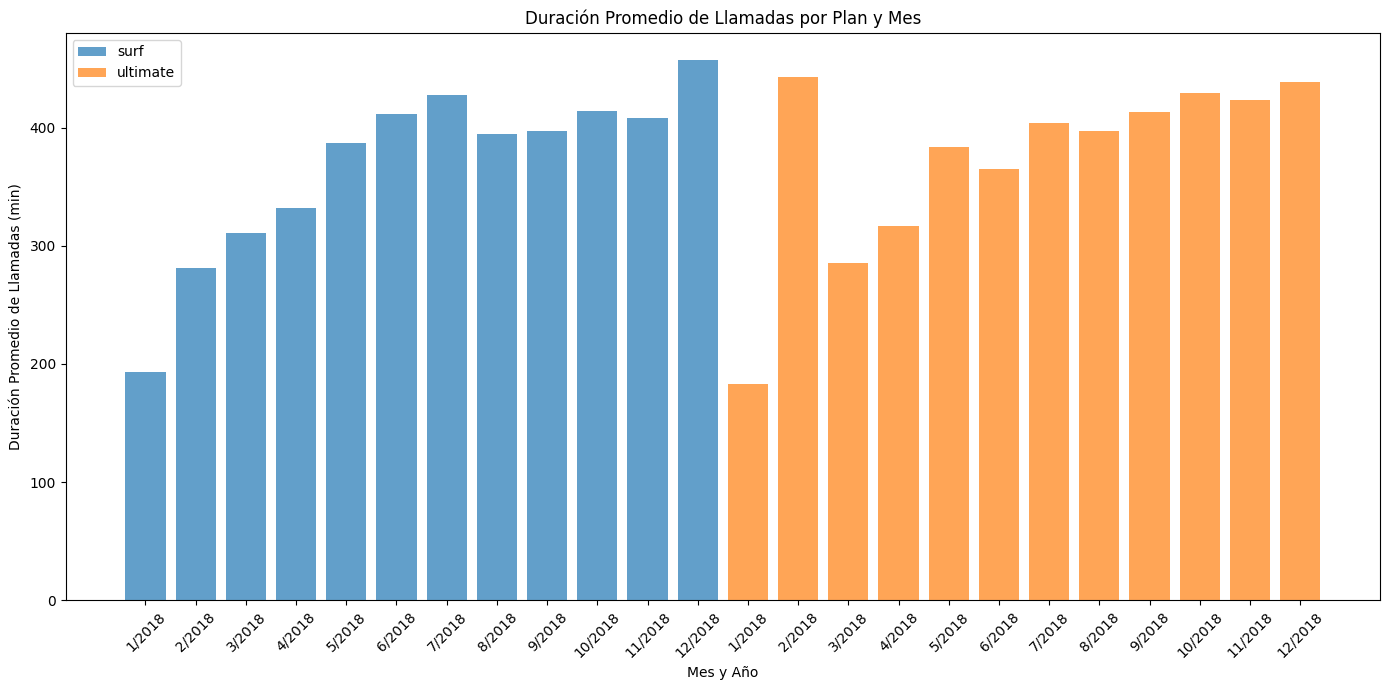

In [38]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla

# Cargar el archivo CSV con los datos fusionados
all_data = pd.read_csv('all_data_with_plan.csv')

# Agrupar por plan, año y mes y calcular la duración promedio de llamadas
avg_calls_duration = all_data.groupby(['plan', 'year', 'month']).agg({'minutes_used': 'mean'}).reset_index()

# Verificar los primeros registros
print(avg_calls_duration.head())

# Traza un gráfico de barras para visualizar la duración promedio de llamadas por plan y mes
plt.figure(figsize=(14, 7))
for plan in avg_calls_duration['plan'].unique():
    subset = avg_calls_duration[avg_calls_duration['plan'] == plan]
    plt.bar(subset.index, subset['minutes_used'], label=plan, alpha=0.7)

plt.xlabel('Mes y Año')
plt.ylabel('Duración Promedio de Llamadas (min)')
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.legend()
plt.xticks(ticks=avg_calls_duration.index, labels=[f'{row["month"]}/{row["year"]}' for _, row in avg_calls_duration.iterrows()], rotation=45)
plt.tight_layout()
plt.show()


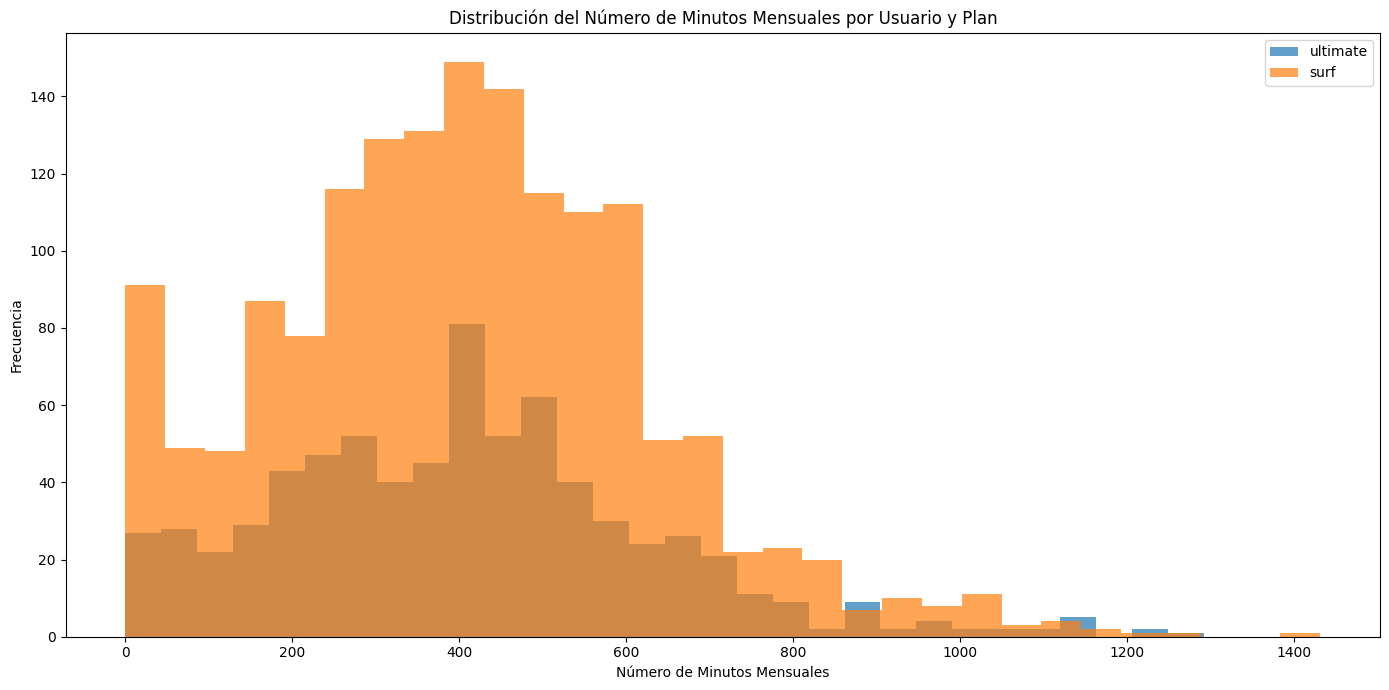

In [53]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Agrupar por usuario, plan, año y mes, y sumar los minutos utilizados
total_minutes_per_user = all_data.groupby(['user_id', 'plan', 'year', 'month']).agg({'minutes_used': 'sum'}).reset_index()

# Crear una figura para los histogramas
plt.figure(figsize=(14, 7))

# Trazar un histograma para cada plan
for plan in total_minutes_per_user['plan'].unique():
    subset = total_minutes_per_user[total_minutes_per_user['plan'] == plan]
    plt.hist(subset['minutes_used'], bins=30, alpha=0.7, label=plan)

# Añadir etiquetas y título
plt.xlabel('Número de Minutos Mensuales')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Minutos Mensuales por Usuario y Plan')
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [40]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Cargar el archivo CSV con los datos fusionados
all_data = pd.read_csv('all_data_with_plan.csv')

# Agrupar por plan, año y mes y calcular la media y varianza de la duración de llamadas
call_stats = all_data.groupby(['plan', 'year', 'month']).agg({
    'minutes_used': ['mean', 'var']
}).reset_index()

# Renombrar las columnas para facilitar el acceso
call_stats.columns = ['plan', 'year', 'month', 'mean_minutes', 'variance_minutes']

# Verificar los primeros registros
print(call_stats)




        plan  year  month  mean_minutes  variance_minutes
0       surf  2018      1    192.840000      14795.440200
1       surf  2018      2    280.851111      46959.219961
2       surf  2018      3    310.970000      31821.317991
3       surf  2018      4    332.380000      45615.666796
4       surf  2018      5    387.108000      50778.127459
5       surf  2018      6    411.450625      39424.054023
6       surf  2018      7    428.060917      53364.540232
7       surf  2018      8    394.474717      46639.240873
8       surf  2018      9    397.133298      39785.302974
9       surf  2018     10    414.435733      44103.681803
10      surf  2018     11    408.255415      43560.874928
11      surf  2018     12    457.547074      53646.781898
12  ultimate  2018      1    183.162500      14991.369958
13  ultimate  2018      2    443.171667      48579.581537
14  ultimate  2018      3    285.701667      54273.917252
15  ultimate  2018      4    316.508095      31057.727496
16  ultimate  

C:\Users\HOME\AppData\Local\Temp\ipykernel_2444\2242508871.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([monthly_duration[monthly_duration['plan'] == plan]['minutes_used'] for plan in monthly_duration['plan'].unique()],


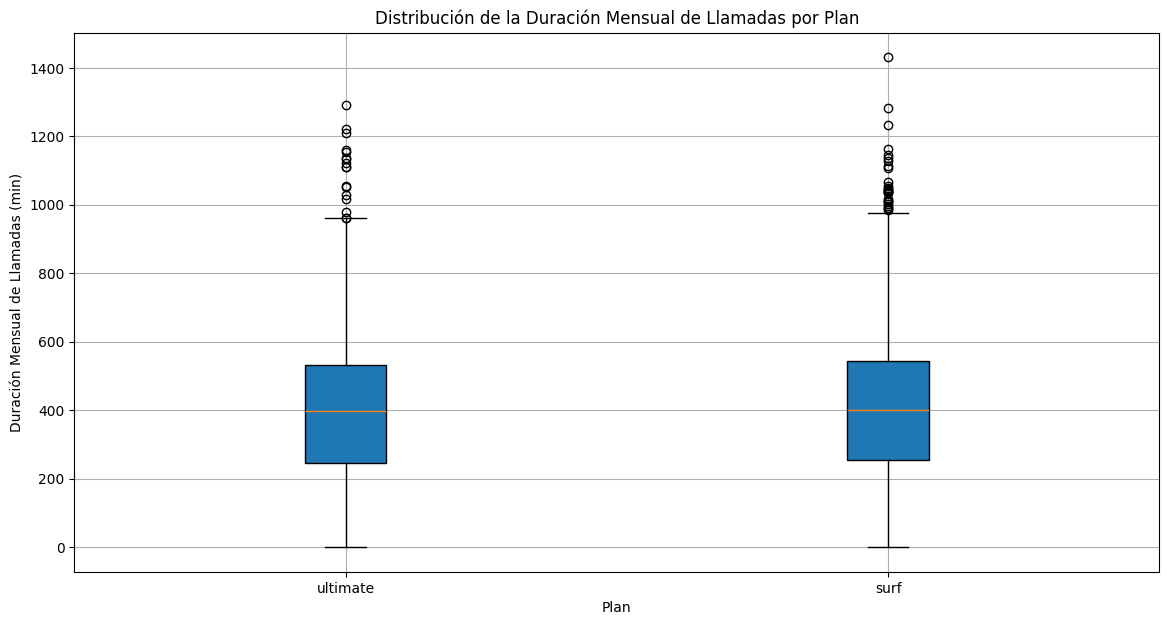

In [41]:
# Cargar el archivo CSV con los datos fusionados
all_data = pd.read_csv('all_data_with_plan.csv')

# Agrupar por plan y calcular la duración mensual total de llamadas
monthly_duration = all_data.groupby(['user_id', 'year', 'month', 'plan'])['minutes_used'].sum().reset_index()

# Crear un gráfico de caja usando matplotlib
plt.figure(figsize=(14, 7))

# Dibujar el diagrama de caja
plt.boxplot([monthly_duration[monthly_duration['plan'] == plan]['minutes_used'] for plan in monthly_duration['plan'].unique()],
            labels=monthly_duration['plan'].unique(), 
            patch_artist=True)

plt.xlabel('Plan')
plt.ylabel('Duración Mensual de Llamadas (min)')
plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.grid(True)
plt.show()



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Uso Promedio:Los usuarios del plan Ultimate tienden a realizar más minutos de llamadas en promedio en comparación con los del plan Surf. Esto podría reflejar una mayor necesidad de comunicación o uso más intensivo del servicio en el plan Ultimate.


Variabilidad:Ambos planes muestran una considerable variabilidad en el uso de minutos, pero el plan Ultimate presenta una mayor dispersión, lo que puede sugerir que los usuarios tienen patrones de uso más diversos.


Tendencias: Tanto los usuarios del plan Surf como del Ultimate muestran un aumento en la duración de las llamadas hacia el final del año, aunque el patrón es más pronunciado en el plan Ultimate.

### 1.11.2 Mensajes

Estadísticas Descriptivas del Número de Mensajes por Plan:
       plan       mean          var
0      surf  31.159568  1126.724522
1  ultimate  37.551389  1208.756744


C:\Users\HOME\AppData\Local\Temp\ipykernel_2444\3058902559.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


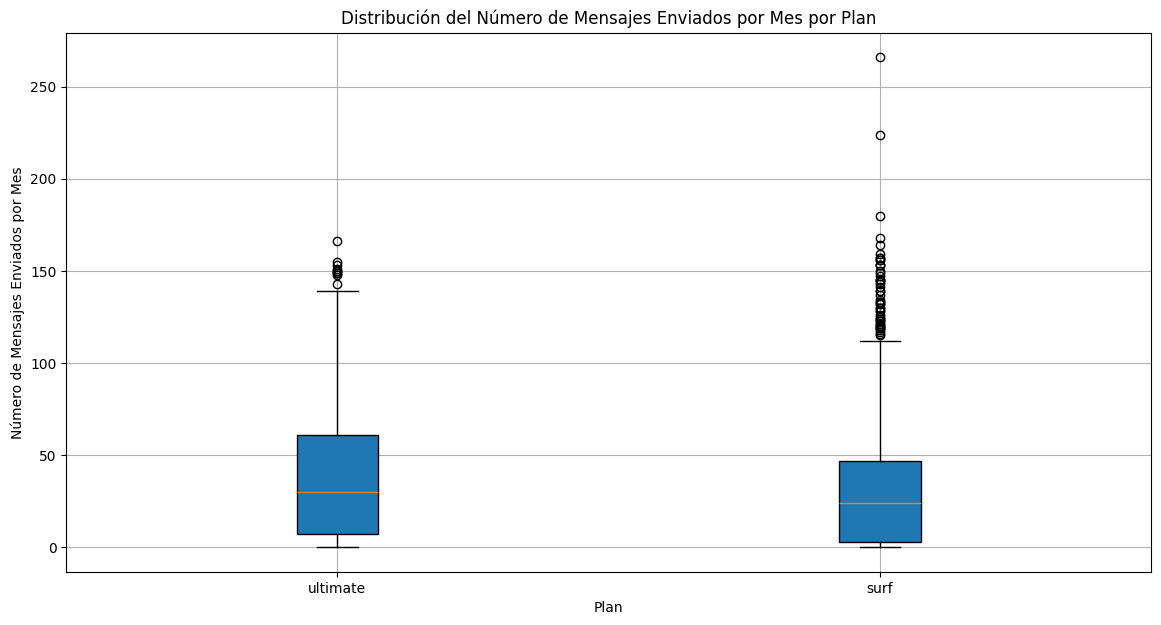

In [42]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Cargar los datos fusionados
all_data = pd.read_csv('all_data_with_plan.csv')

# Agrupar por plan y calcular el número total de mensajes enviados por mes
monthly_messages = all_data.groupby(['user_id', 'year', 'month', 'plan'])['messages_sent'].sum().reset_index()

# Calcular la media y la varianza del número de mensajes enviados por mes por plan
stats_messages = monthly_messages.groupby('plan')['messages_sent'].agg(['mean', 'var']).reset_index()
print("Estadísticas Descriptivas del Número de Mensajes por Plan:")
print(stats_messages)

# Crear un gráfico de caja usando matplotlib
plt.figure(figsize=(14, 7))

# Dibujar el diagrama de caja
plt.boxplot(
    [monthly_messages[monthly_messages['plan'] == plan]['messages_sent'] for plan in monthly_messages['plan'].unique()],
    labels=monthly_messages['plan'].unique(),
    patch_artist=True
)

plt.xlabel('Plan')
plt.ylabel('Número de Mensajes Enviados por Mes')
plt.title('Distribución del Número de Mensajes Enviados por Mes por Plan')
plt.grid(True)
plt.show()


Estadísticas Descriptivas del Tráfico de Internet Consumido por Plan:
       plan          mean           var
0      surf  16558.283490  6.421640e+07
1  ultimate  17214.699694  6.165229e+07


C:\Users\HOME\AppData\Local\Temp\ipykernel_2444\1494242916.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


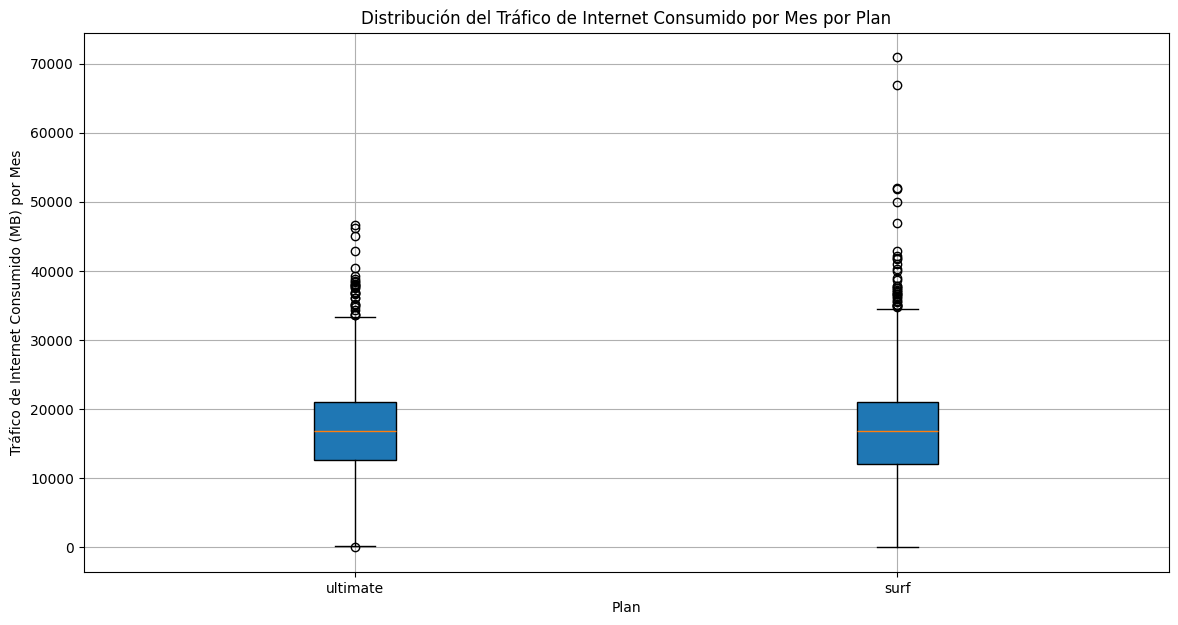

In [43]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Cargar los datos fusionados
all_data = pd.read_csv('all_data_with_plan.csv')

# Agrupar por plan y calcular el tráfico total de Internet consumido por mes
monthly_internet = all_data.groupby(['user_id', 'year', 'month', 'plan'])['data_used_mb'].sum().reset_index()

# Calcular la media y la varianza del tráfico de Internet consumido por mes por plan
stats_internet = monthly_internet.groupby('plan')['data_used_mb'].agg(['mean', 'var']).reset_index()
print("Estadísticas Descriptivas del Tráfico de Internet Consumido por Plan:")
print(stats_internet)

# Crear un gráfico de caja usando matplotlib
plt.figure(figsize=(14, 7))

# Dibujar el diagrama de caja
plt.boxplot(
    [monthly_internet[monthly_internet['plan'] == plan]['data_used_mb'] for plan in monthly_internet['plan'].unique()],
    labels=monthly_internet['plan'].unique(),
    patch_artist=True
)

plt.xlabel('Plan')
plt.ylabel('Tráfico de Internet Consumido (MB) por Mes')
plt.title('Distribución del Tráfico de Internet Consumido por Mes por Plan')
plt.grid(True)
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Varianza: En ambos casos, la varianza es alta, indicando una gran dispersión en el uso tanto de mensajes como de datos.

Outliers: Ambos planes muestran varios outliers en el uso de mensajes y datos, lo que sugiere que hay usuarios que consumen mucho más de lo habitual.

Uso Promedio: Los usuarios del plan Ultimate tienden a enviar más mensajes y consumir más datos en promedio que los del plan Surf.

### 1.11.3 Internet

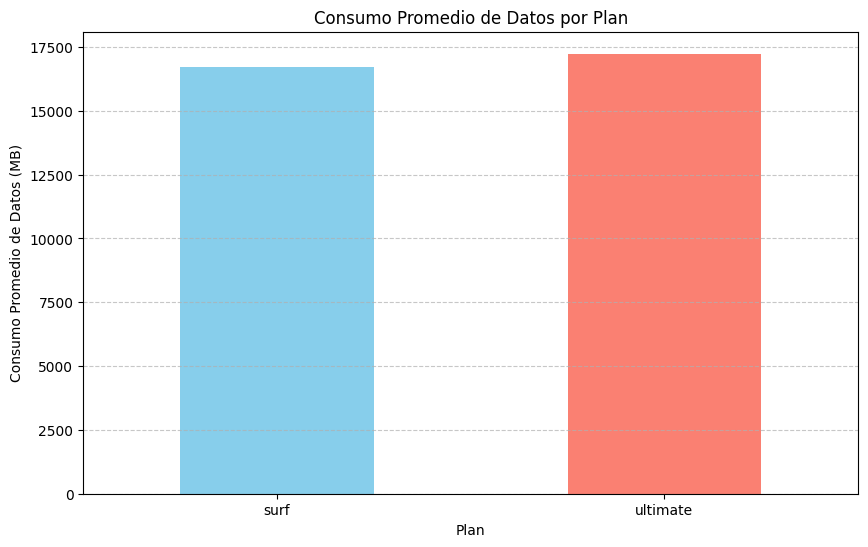

In [44]:
#Consumo Promedio de Datos por Plan

# Agrupar datos por plan y calcular la media del consumo de datos
average_data_usage = all_data.groupby('plan')['data_used_mb'].mean()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
average_data_usage.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Consumo Promedio de Datos por Plan')
plt.xlabel('Plan')
plt.ylabel('Consumo Promedio de Datos (MB)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


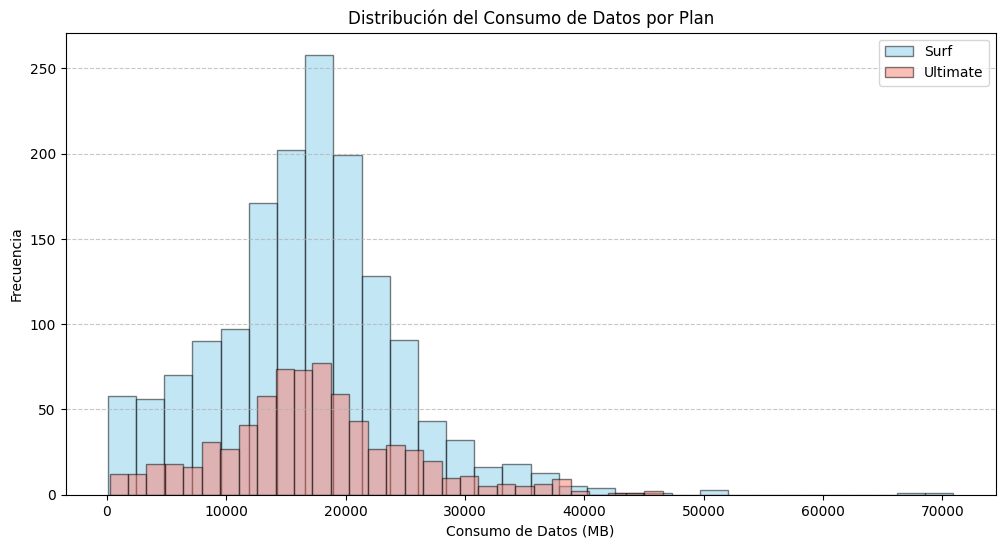

In [45]:
plt.figure(figsize=(12, 6))

# Histograma para el plan Surf
plt.hist(all_data[all_data['plan'] == 'surf']['data_used_mb'], bins=30, alpha=0.5, label='Surf', color='skyblue', edgecolor='black')

# Histograma para el plan Ultimate
plt.hist(all_data[all_data['plan'] == 'ultimate']['data_used_mb'], bins=30, alpha=0.5, label='Ultimate', color='salmon', edgecolor='black')

plt.title('Distribución del Consumo de Datos por Plan')
plt.xlabel('Consumo de Datos (MB)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<Figure size 1000x600 with 0 Axes>

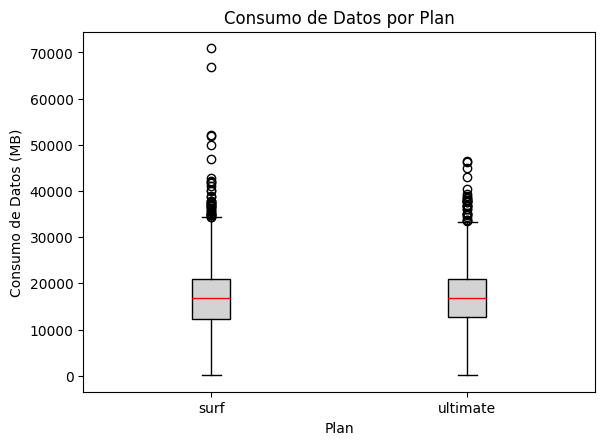

In [46]:
#Caja del Consumo de Datos por Plan

plt.figure(figsize=(10, 6))
all_data.boxplot(column='data_used_mb', by='plan', grid=False, patch_artist=True, 
                 boxprops=dict(facecolor='lightgrey', color='black'),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'),
                 medianprops=dict(color='red'))
plt.title('Consumo de Datos por Plan')
plt.suptitle('')  # Eliminar el título adicional
plt.xlabel('Plan')
plt.ylabel('Consumo de Datos (MB)')
plt.show()


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Primedio: se evidencia en el plan ultimate tiene mayor flujo de internet que el plan surf por muy pocas sifras lo que da a entender que ambos tienen simulitud en su consumo pero como se enuncia anteriormente tambiens ufren incremento finalizando el periodo anual

Dispercion: se evidencia el plan surf tiene el mayor consumo de datosl ser de los planes con menor costo lo cual lo hace mas accesible a la comunidad

Tendencia: tanto surf como ultimate tienden a tener su media en puntos muy similares como se ve en el diagrama de barras, mas sin embargo el diagrama de cajas nos da a entender que ambos tienden similutud en sus cuartiles e incluso puntos atipios que se pueden altererar la media al estar muy a lo superior

## 1.12 Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

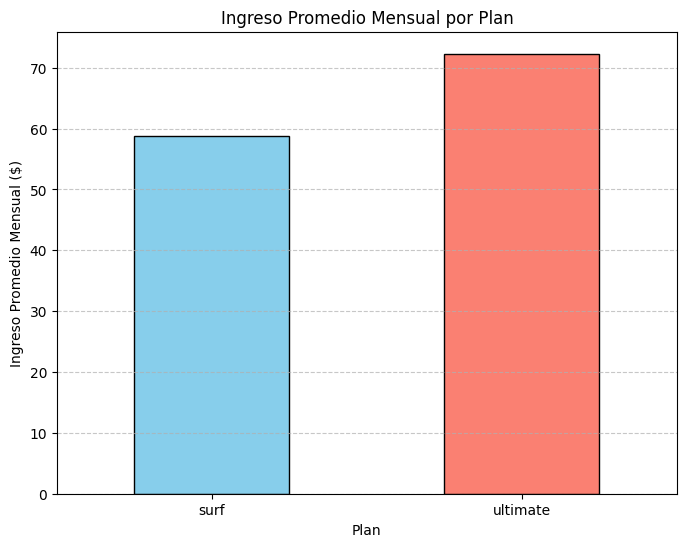

In [47]:
all_data_with_revenue = pd.read_csv('D:all_data_with_revenue.csv')

# Calcular el ingreso promedio mensual por plan
average_revenue = all_data_with_revenue.groupby('plan')['monthly_revenue'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
average_revenue.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Personalizar el gráfico
plt.title('Ingreso Promedio Mensual por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso Promedio Mensual ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()




Valores de ingresos para Surf: Min=20.0, Max=572.28
Valores de ingresos para Ultimate: Min=70.0, Max=182.0


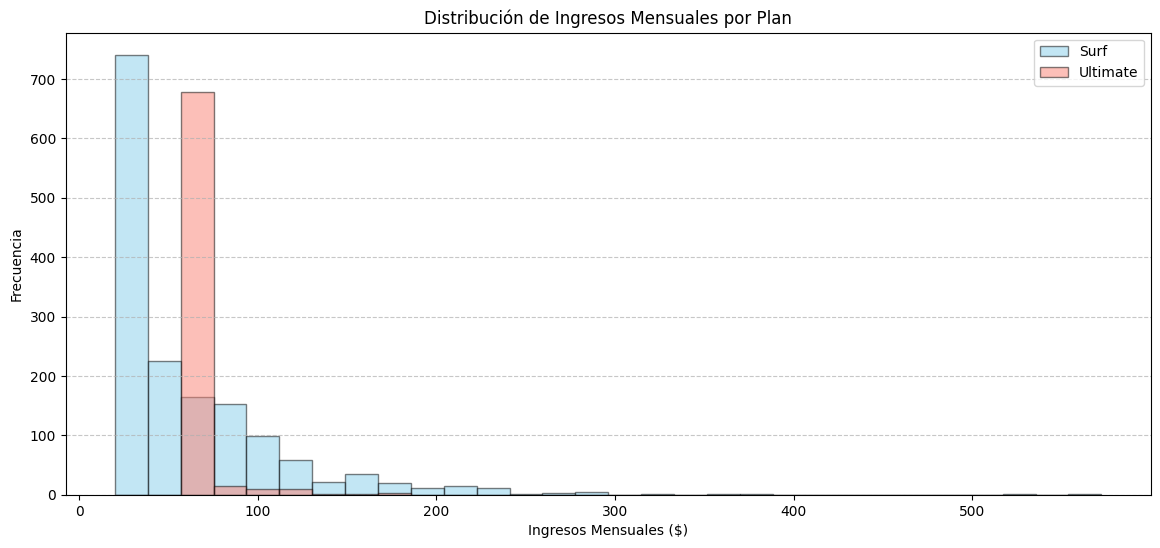

In [48]:
# Definir el tamaño de la figura
plt.figure(figsize=(14, 6))

# Filtrar los datos para cada plan
surf_revenue = all_data_with_revenue[all_data_with_revenue['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = all_data_with_revenue[all_data_with_revenue['plan'] == 'ultimate']['monthly_revenue']

# Verificar valores de ingreso
print(f"Valores de ingresos para Surf: Min={surf_revenue.min()}, Max={surf_revenue.max()}")
print(f"Valores de ingresos para Ultimate: Min={ultimate_revenue.min()}, Max={ultimate_revenue.max()}")

# Establecer los límites de los bins
min_revenue = min(all_data_with_revenue['monthly_revenue'])
max_revenue = max(all_data_with_revenue['monthly_revenue'])

# Definir el número de bins
num_bins = 30  # Ajusta este número según sea necesario
bin_edges = np.linspace(min_revenue, max_revenue, num_bins + 1)

# Graficar el histograma
plt.hist(surf_revenue, bins=bin_edges, alpha=0.5, label='Surf', color='skyblue', edgecolor='black')
plt.hist(ultimate_revenue, bins=bin_edges, alpha=0.5, label='Ultimate', color='salmon', edgecolor='black')

# Personalizar el gráfico
plt.title('Distribución de Ingresos Mensuales por Plan')
plt.xlabel('Ingresos Mensuales ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


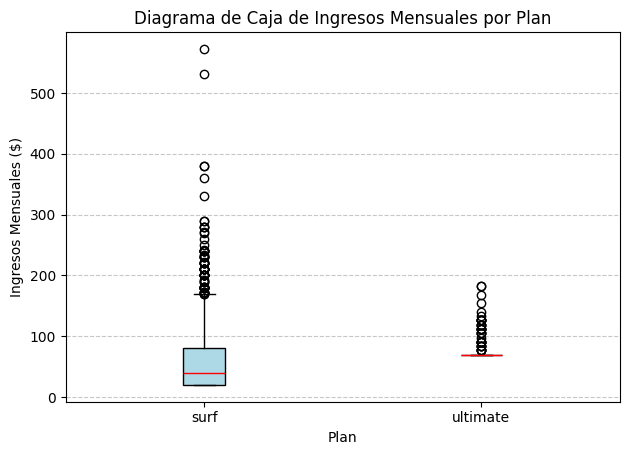

In [49]:
# Diagrama de Caja de ingresos por plan

all_data_with_revenue.boxplot(column='monthly_revenue', by='plan', grid=False, patch_artist=True, 
                              boxprops=dict(facecolor='lightblue', color='black'),
                              whiskerprops=dict(color='black'), 
                              capprops=dict(color='black'), 
                              medianprops=dict(color='red'))
plt.title('Diagrama de Caja de Ingresos Mensuales por Plan')
plt.suptitle('')  # Suprime el título por defecto
plt.xlabel('Plan')
plt.ylabel('Ingresos Mensuales ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Promedio: el plan ultimate es el que tiene mayor ingreso promedio en general superando a surf por casi 10 puntos a pesar de los datos posiblemente atipicos que presenta cada uno

Dispercion: evidenciamos que como se indicaba en el inicio el pago de surf inicia en 20 y el ultimate en 70 por tal motivo evidenciamos con el histograma esta divicion y a pesar de que viusalmente pareciera el domini estar en surf el plan ultimate sige superando en ingresos

Tendencia: Se sugiere que la mediana como se comento del plan ultimate esta en netamente ubicada en 70 como  lo demustra el diagrama de cajas y bigotes con uno que otro dato por encima del Q3 ya con el surf al ser un plan mas flexible y como vimos de los mas usados presenta una tendencia de una mediana por encima de 20 que es su valor de inicio 

## 1.13 Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

1. Formulación de las Hipótesis
'Hipótesis Nula (H₀):'
Los ingresos promedio de los usuarios de los planes "Ultimate" y "Surf" son iguales.
Hipótesis Alternativa (H₁):
Los ingresos promedio de los usuarios de los planes "Ultimate" y "Surf" son diferentes.
2. Elección de la Prueba Estadística
Dado que queremos comparar las medias de dos grupos independientes ("Ultimate" y "Surf"), usaremos la prueba t de Student para muestras independientes.

3. Determinación del Nivel de Significación (Alfa)
El nivel de significación (
𝛼
α) es el umbral que utilizamos para decidir si rechazamos o no la hipótesis nula. Un valor comúnmente utilizado es 0.05
α=0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un error de Tipo I (rechazar una hipótesis nula verdader

In [50]:
# Filtrar los datos por plan
ultimate_revenue = all_data_with_revenue[all_data_with_revenue['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = all_data_with_revenue[all_data_with_revenue['plan'] == 'surf']['monthly_revenue']

# Realizar la prueba t de Student
t_stat, p_value = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

# Mostrar los resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Interpretar el valor p
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio entre los planes 'Ultimate' y 'Surf'.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para decir que los ingresos promedio entre los planes 'Ultimate' y 'Surf' son diferentes.")


Estadístico t: 9.344718611813233
Valor p: 2.5613755181532966e-20
Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio entre los planes 'Ultimate' y 'Surf'.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

1. Formulación de las Hipótesis
Hipótesis Nula (H₀):
El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.

Hipótesis Alternativa (H₁):
El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

2. Elección de la Prueba Estadística
Para comparar las medias de dos grupos independientes (usuarios del área NY-NJ y usuarios de otras regiones), usaremos la prueba t de Student para muestras independientes.

3. Determinación del Nivel de Significación (Alfa)
El nivel de significación (𝛼) es el umbral que utilizamos para decidir si rechazamos o no la hipótesis nula. Un valor comúnmente utilizado es α=0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un error de Tipo I (rechazar una hipótesis nula verdadera).

In [51]:
#Unir data de all_data_revenue con el de user pues es esta segunda la que tiene la columna city con el caracter 'NY-NJ'
combined_data = pd.merge(all_data_with_revenue, users[['user_id', 'city']], on='user_id', how='left')
# Filtrar usuarios de NY-NJ
ny_nj_users = combined_data[combined_data['city'].str.contains('NY-NJ')]

# Filtrar usuarios de otras regiones
other_users = combined_data[~combined_data['city'].str.contains('NY-NJ')]

# Obtener los ingresos de cada grupo
ny_nj_income = ny_nj_users['monthly_revenue']
other_income = other_users['monthly_revenue']


# Realizar la prueba t
t_statistic, p_value = st.ttest_ind(ny_nj_income, other_income, equal_var=False)

# Mostrar los resultados
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretar el valor p
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
    print("Conclusión: Hay evidencia suficiente para afirmar que los ingresos promedio de los usuarios de NY-NJ son significativamente diferentes a los de los usuarios de otras regiones.")
else:
    print("No rechazamos la hipótesis nula.")
    print("Conclusión: No hay evidencia suficiente para afirmar que los ingresos promedio de los usuarios de NY-NJ son significativamente diferentes a los de los usuarios de otras regiones.")




T-statistic: -2.1923231649466426
P-value: 0.028765503550625456
Rechazamos la hipótesis nula.
Conclusión: Hay evidencia suficiente para afirmar que los ingresos promedio de los usuarios de NY-NJ son significativamente diferentes a los de los usuarios de otras regiones.


## 1.14 Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]


1. Se logra evidencar generalmente el impacto que tiene actualmente los ingresos y usos del plan surf y ultimate dandonos a ver que estos tienen una diferencia significativa el uno del otro donde  tienen un comportamiento similar a pesar de ser el plan surf el mas cotizado 
2. A partir de la graficacion evidenciamos exiten bastantes diferencian especificamente en la visual en como es el surf mas usado pero a pesar de eso el ultimate es qeu que genera mayor ingresos.
3. Como recomendacion al ver el comportamiento medio de cada mes es considerable dar un correcta atencion al cliente en finales del periodo anual al evidenciar estos meses con la mayor  magnitud de usuarios  por lo cual es importante no descuidar la dos pero posiblemente indagar en la posibilidad de nejorar los precios del plan ultimate con el fin de que mas clientes accedan a este al ser el plan con mayor ingreso punto de interes para el equipo de publicidad
